In [310]:
import tensorflow as tf
import matplotlib.pyplot as plt
import glob as glob
import os

from zipfile import ZipFile
from urllib.request import urlretrieve

In [311]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    urlretrieve(url, save_path)

    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [312]:
URL = r"https://www.dropbox.com/scl/fi/6rldf9ajuohpslgavw8ii/images.zip?rlkey=tq980h71qsci6i7pwe3vi9czk&st=5pw775uc&dl=0&dl=1"

asset_zip_path = os.path.join(os.getcwd(), "images.zip")

if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

In [313]:
# Store all the image paths in a list.
image_paths = sorted(glob.glob("images" + os.sep + "*.png"))
print(image_paths)

['images/bear.png', 'images/dog.png', 'images/fish.png', 'images/isaac-ibbott--002g4wurYQ-unsplash.png', 'images/mathias-konrath-Y7BG6yO9Q9o-unsplash.png', 'images/nik-shuliahin-BWRyS1-KKrs-unsplash.png', 'images/noah-buscher-G0m9kKvkkB8-unsplash.png', 'images/sam-carter-GHOiyov2TSQ-unsplash.png']


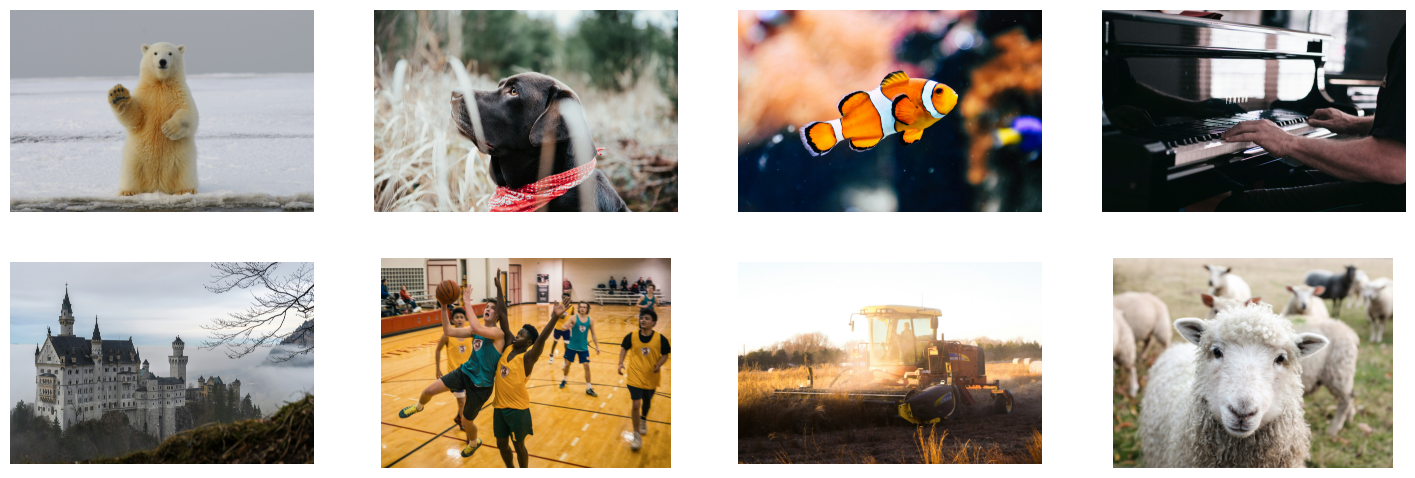

In [314]:
plt.figure(figsize=(18, 6))
for idx, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(2,4,idx+1)
    plt.imshow(image)
    plt.axis('off') 

In [315]:
model_vgg16        = tf.keras.applications.vgg16.VGG16()
model_resnet50     = tf.keras.applications.resnet50.ResNet50()
model_inception_v3 = tf.keras.applications.inception_v3.InceptionV3()

In [316]:
print(model_vgg16.input_shape)
print(model_resnet50.input_shape)
print(model_inception_v3.input_shape)

(None, 224, 224, 3)
(None, 224, 224, 3)
(None, 299, 299, 3)


In [317]:
def process_images(model, image_paths, size, preprocess_input, display_top_k=False, top_k=2):
    
    plt.figure(figsize=(20,7))
    for idx, image_path in enumerate(image_paths):

        tf_image = tf.io.read_file(image_path)

        decoded_image = tf.image.decode_image(tf_image)
        image_resized = tf.image.resize(decoded_image, size)
        image_batch = tf.expand_dims(image_resized, axis=0)
        image_batch = preprocess_input(image_batch)

        preds = model.predict(image_batch)

        # Decode (and rank the top-k) predictions.
        # Returns a list of tuples: (class ID, class description, probability)
        decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
            preds=preds,
            top=5
        )
        
        if display_top_k == True:
            for jdx in range(top_k):
                print("Top {} predicted class:   Pr(Class={:20} [index={:4}]) = {:5.2f}".format(
                    jdx + 1, decoded_preds[0][jdx][1], jdx, decoded_preds[0][jdx][2] * 100))
    
        plt.subplot(2,4,idx+1)
        plt.imshow(decoded_image)
        plt.axis('off')
        label = decoded_preds[0][0][1]
        score = decoded_preds[0][0][2] * 100
        title = label + ' ' + str('{:.2f}%'.format(score))
        plt.title(title, fontsize=16)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


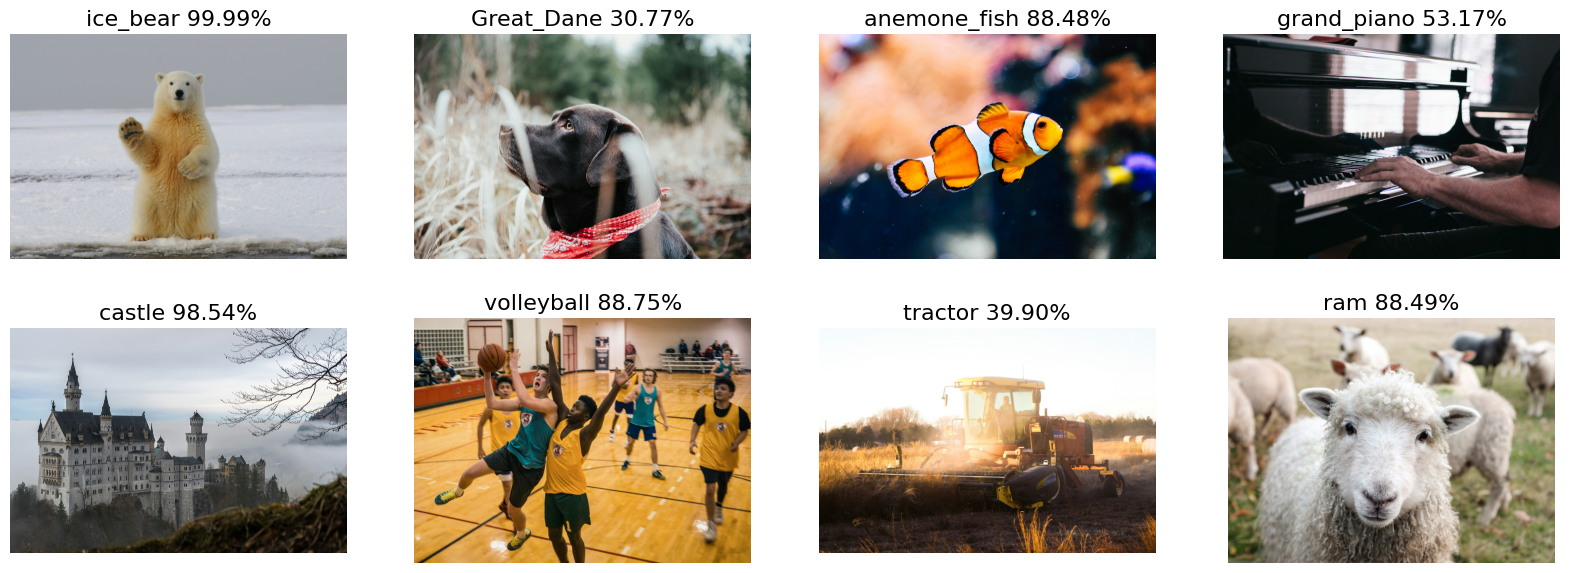

In [318]:
model = model_vgg16
size = (224, 224) 

preprocess_input = tf.keras.applications.vgg16.preprocess_input

process_images(model, image_paths, size, preprocess_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


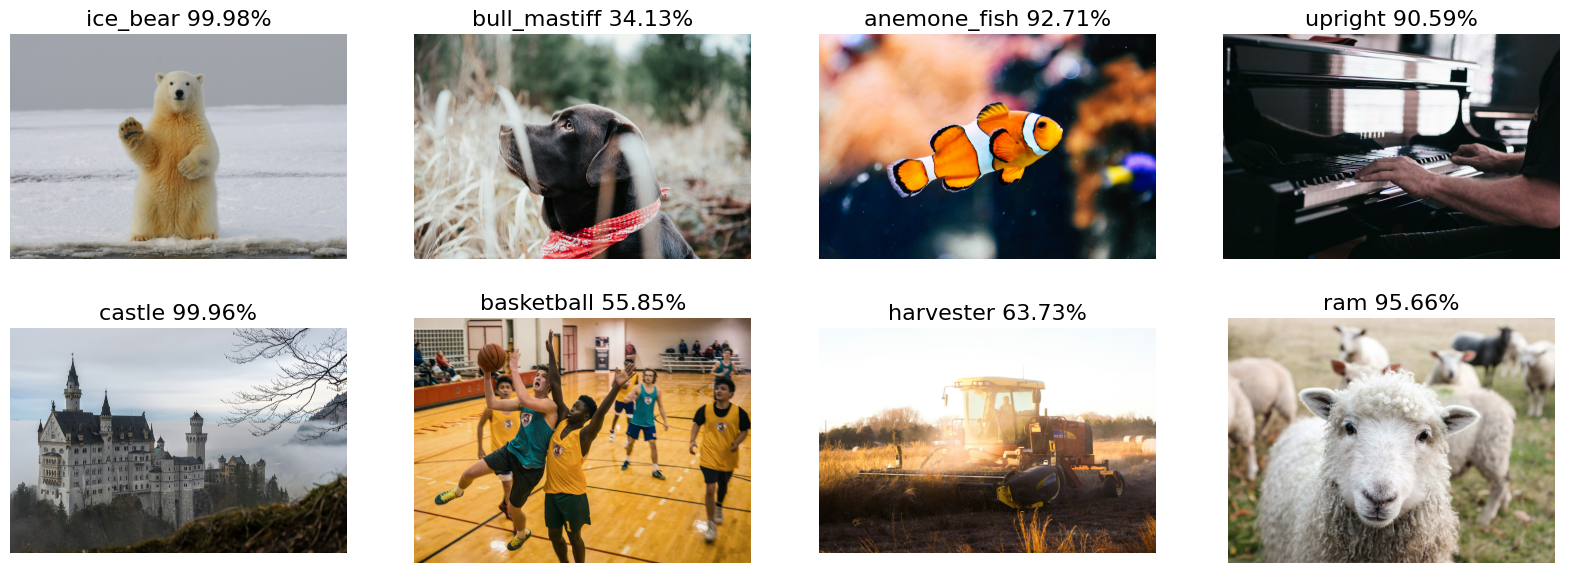

In [319]:
model = model_resnet50
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_images(model, image_paths, size, preprocess_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Top 1 predicted class:   Pr(Class=ice_bear             [index=   0]) = 96.17
Top 2 predicted class:   Pr(Class=brown_bear           [index=   1]) =  0.07
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Top 1 predicted class:   Pr(Class=German_short-haired_pointer [index=   0]) = 97.10
Top 2 predicted class:   Pr(Class=Labrador_retriever   [index=   1]) =  0.55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Top 1 predicted class:   Pr(Class=anemone_fish         [index=   0]) = 97.15
Top 2 predicted class:   Pr(Class=coral_reef           [index=   1]) =  0.42
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Top 1 predicted class:   Pr(Class=upright              [index=   0]) = 49.26
Top 2 predicted class:   Pr(Class=grand_piano          [index=   1]) = 48.63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Top 1 predicted class:   Pr(Class=castle               [index=   0]) = 90.38
Top 2 predicted class:   Pr(Class=palace               [index=   1]) =  0.90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/st

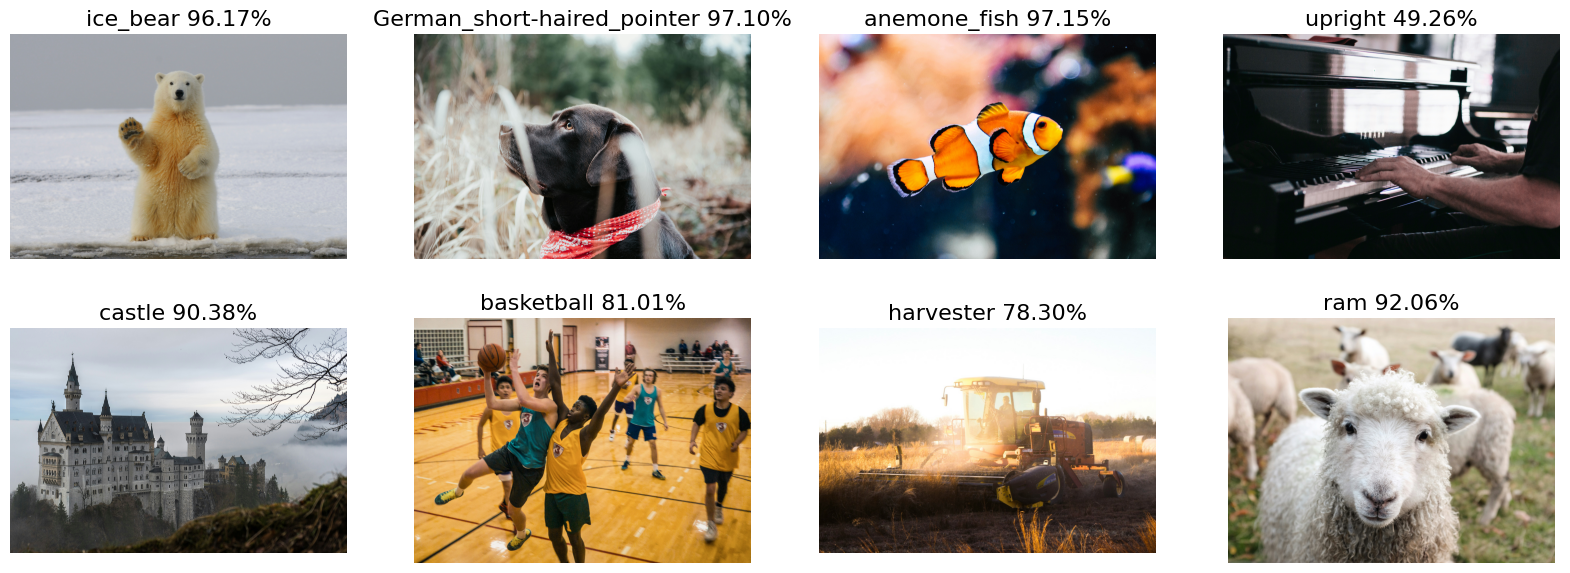

In [320]:
model = model_inception_v3
size = (299, 299)

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

process_images(model, image_paths, size, preprocess_input, display_top_k=True)